In [1]:
import plotly.io as pio
pio.renderers.default = "png"

import sys
sys.path.append('../../')

from aztec_gddt.analysis.execute import execute_sim, complexity_desc
from aztec_gddt.analysis.visualizations import plot_agg_kpis, plot_inspect_vars
from aztec_gddt.analysis.metrics import *
from aztec_gddt.scenario_experiments import *

In [2]:
from aztec_gddt.helper_types import ExperimentParamSpec

exp_spec = ExperimentParamSpec(
    params_swept_control={
        'VALIDATOR_COMMITTEE_SIZE': [128, 512],
        'SIGNATURES_NEEDED': [0.0, 1.0]
    },
    params_swept_env={
        'MAX_VALIDATORS_TO_SLASH': [0.0, 1.0],
        'SIGNATURE_SKIP_PROBABILITY': [0.00, 1.0]

    },
    N_timesteps=1_000,
    N_samples=1,
    N_config_sample=-1
)

In [3]:
CONTROL_PARAMS = list(exp_spec.params_swept_control.keys())

sim_df, exec_time = execute_sim(exp_spec.prepare())


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.5.3
Execution Mode: single_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 1000, 47, 16, 32)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (1000, 47, 16, 32)


Initializing configurations:   0%|          | 0/16 [00:00<?, ?it/s]

Execution Method: single_proc_exec


Flattening results:   0%|          | 0/112016 [00:00<?, ?it/s]

Total execution time: 6.17s


In [4]:
print(complexity_desc(sim_df, exec_time))


    #### Computational Complexity:
    1. Total number of parameter combinations: 16
    2. Total number of Monte Carlo runs per parameter combination: 16
    3. Total number of trajectories: 16
    4. Total number of timesteps per trajectory: 1,000
    5. Total number of state measurements: 16,016
    6. Workflow execution time: 10.5 seconds (0.654 seconds per trajectory)
    7. Engine execution time: 6.17 seconds (0.386 seconds per trajectory)
    


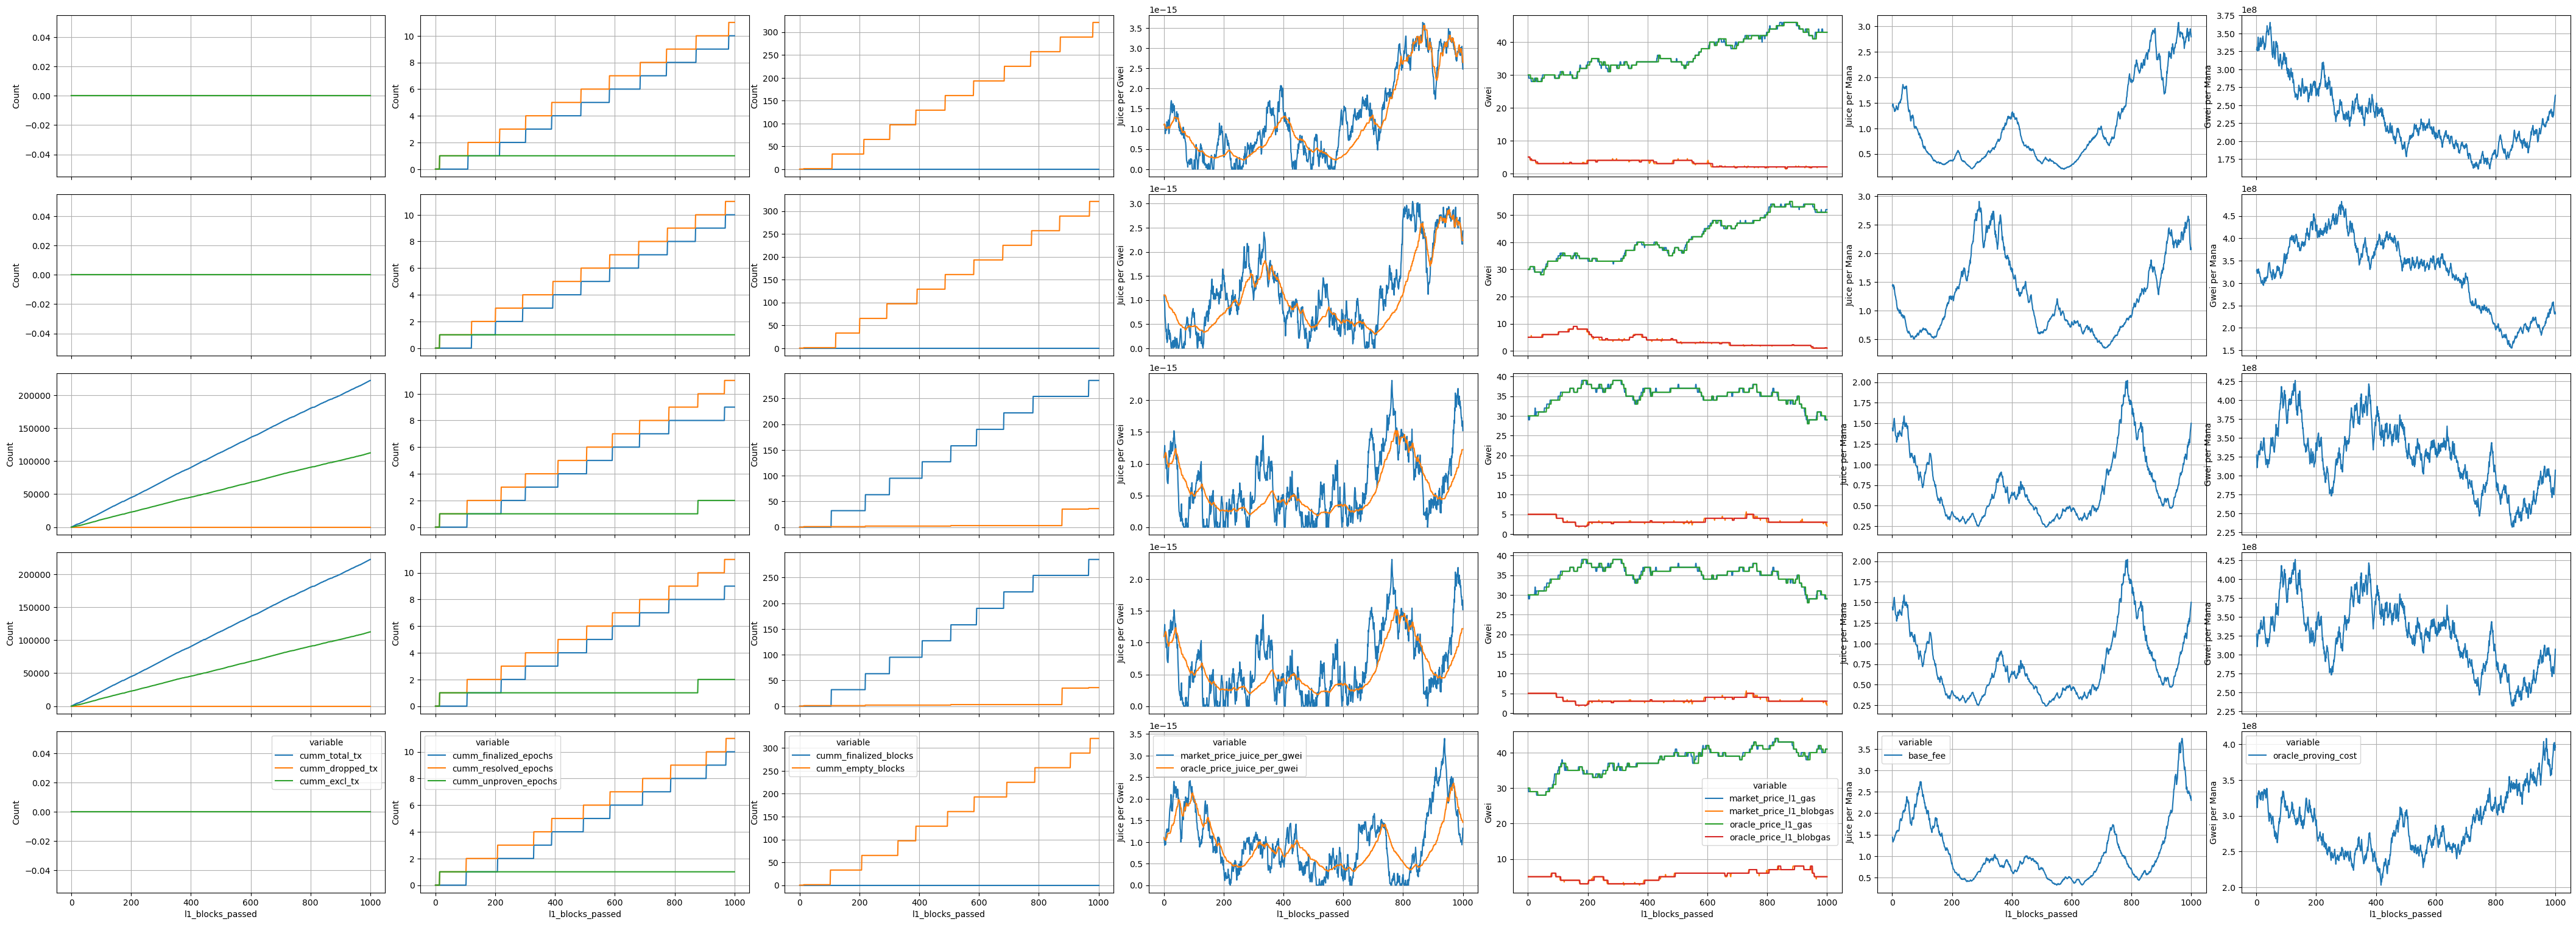

In [5]:
plot_inspect_vars(sim_df)

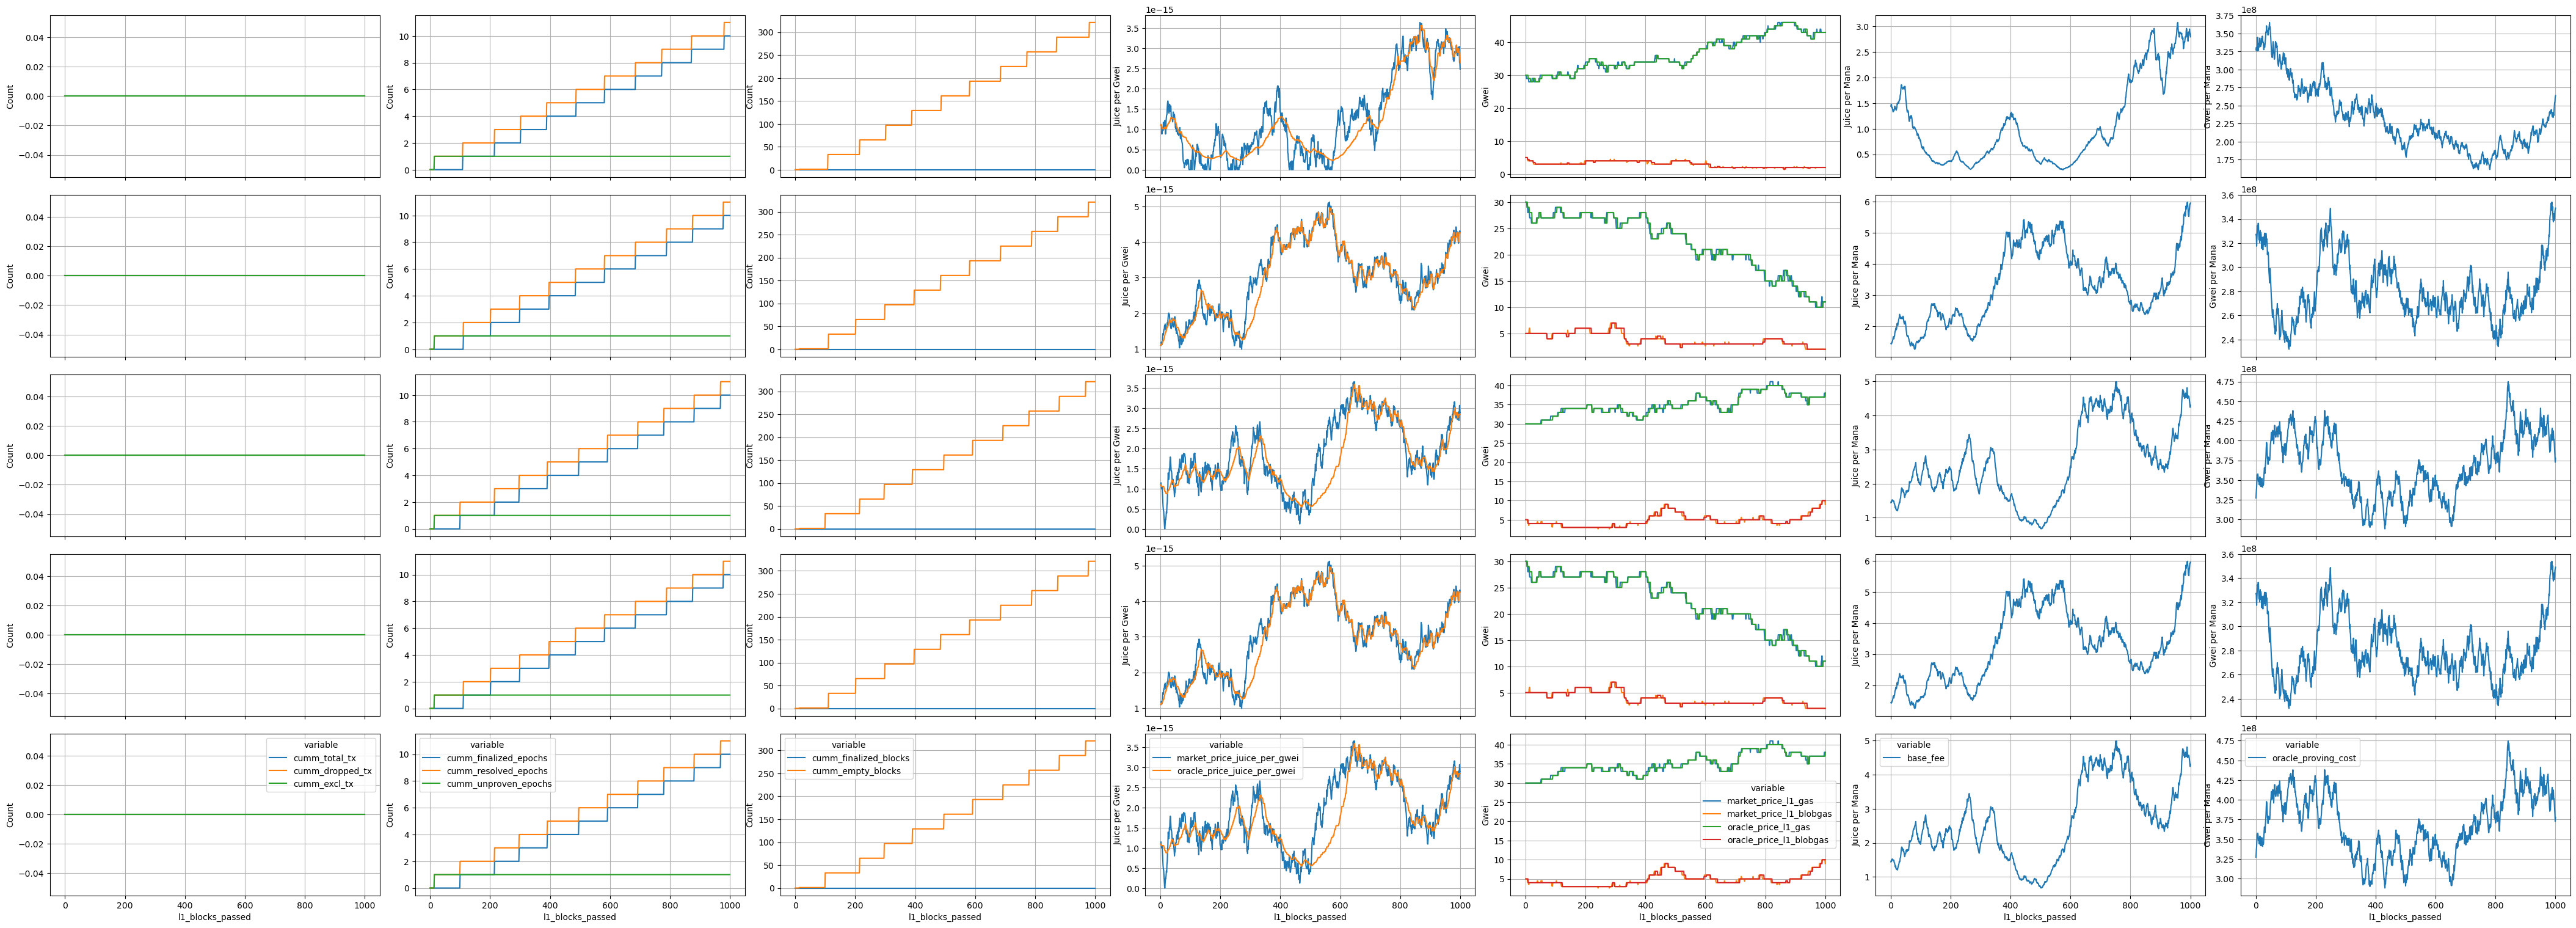

In [6]:
plot_inspect_vars(sim_df.query('SIGNATURE_SKIP_PROBABILITY == 1.0'))

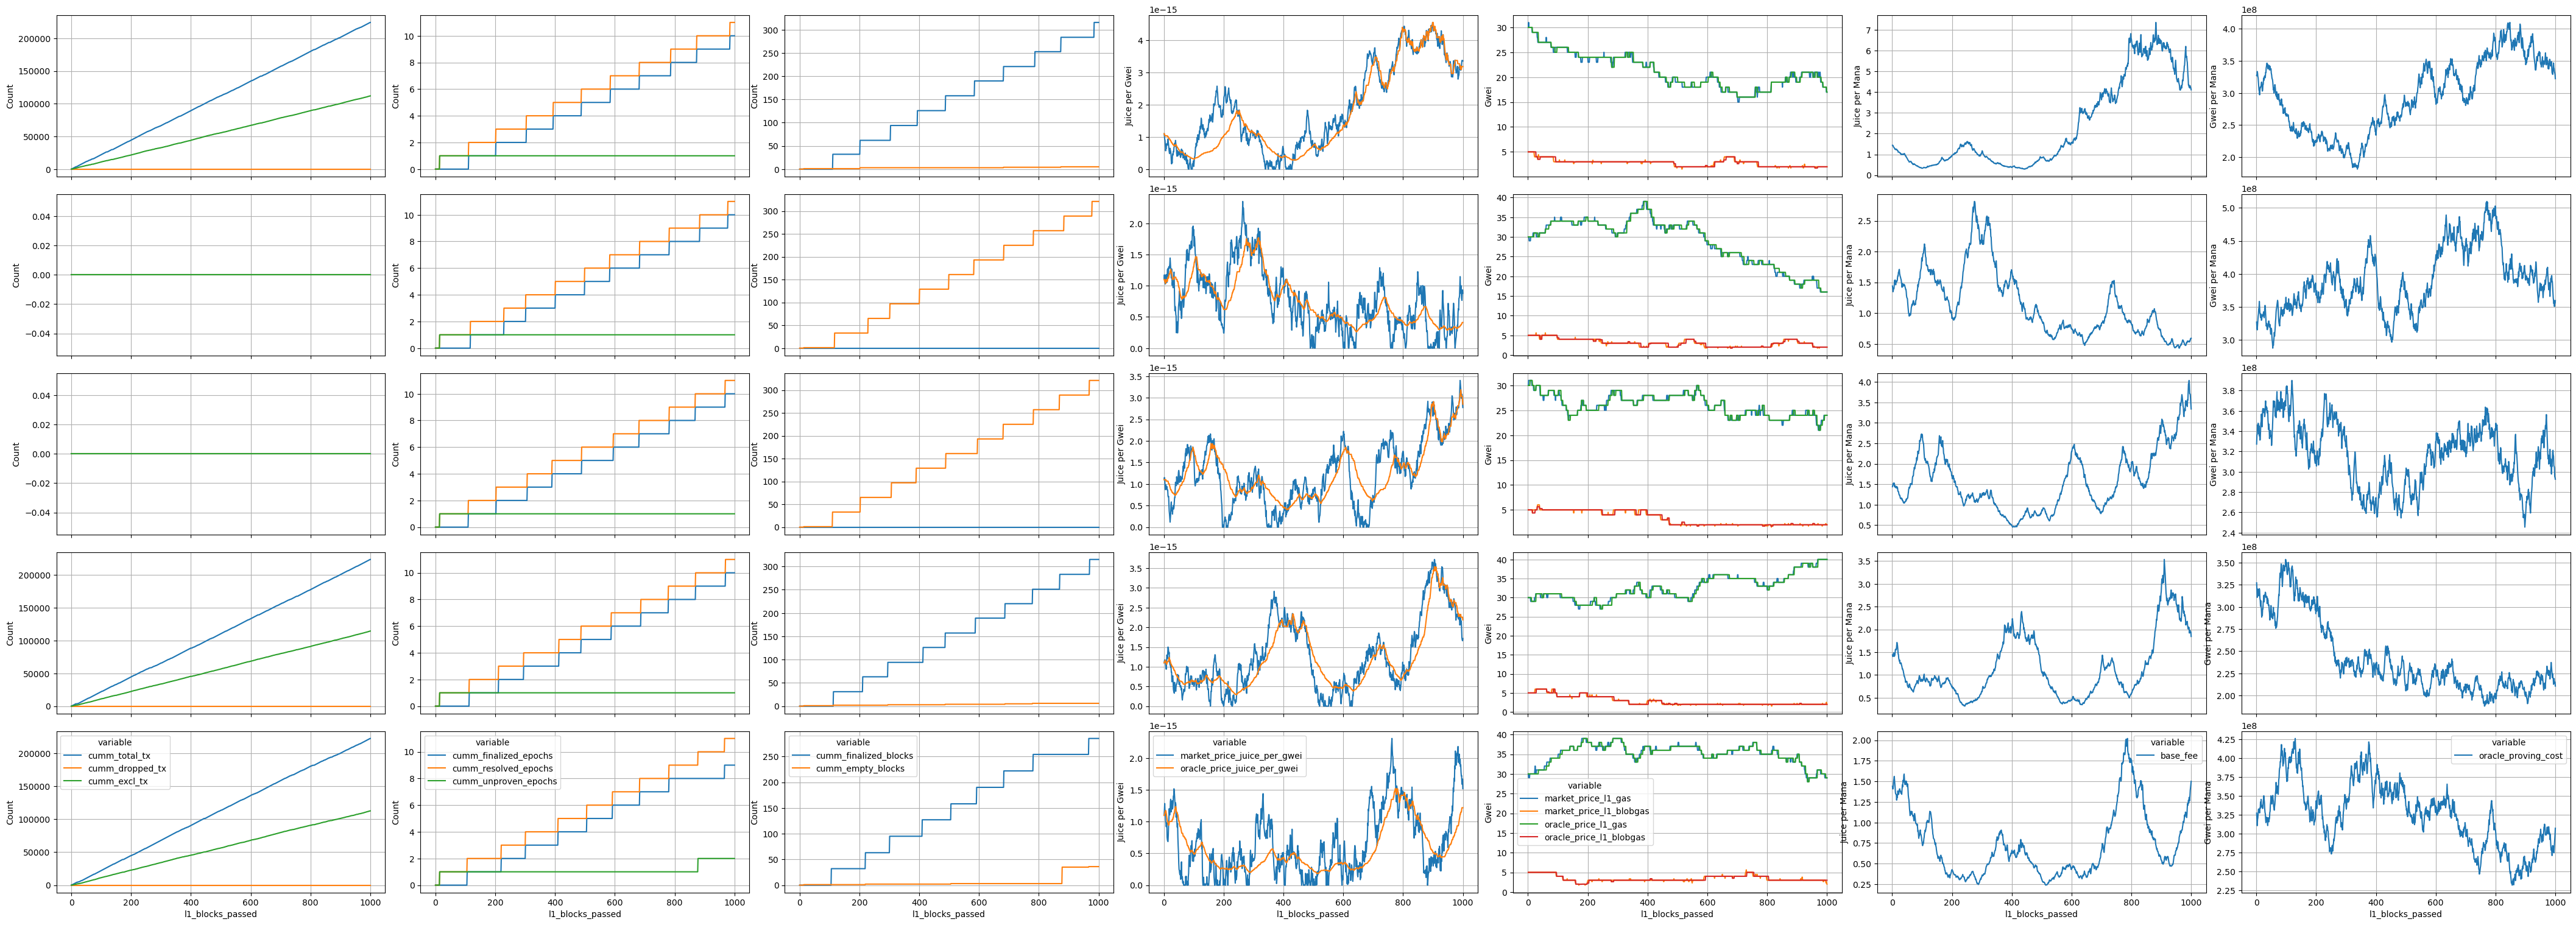

In [7]:
plot_inspect_vars(sim_df.query('SIGNATURE_SKIP_PROBABILITY == 0.0'))